# Heart Disease - Classifications (Machine Learning)

Demonstrate predicting if heart disease is present or not using Logistic Regression (Classification) Algorithm

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Read Data

In [125]:
df = pd.read_csv('Data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains following features and target variables:
- age - age in years 
- sex - (1 = male; 0 = female) 
- cp - chest pain type 
- trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
- chol - serum cholestoral in mg/dl 
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg - resting electrocardiographic results 
- thalach - maximum heart rate achieved 
- exang - exercise induced angina (1 = yes; 0 = no) 
- oldpeak - ST depression induced by exercise relative to rest 
- slope - the slope of the peak exercise ST segment 
- ca - number of major vessels (0-3) colored by flourosopy 
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
- target - have disease or not (1=yes, 0=no)

#### Explore Data

In [126]:
# Check distribution of values of target variable
# Target variable has two values viz., 0 and 1 of int type
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, 'Patients (0 = without heart disease, 1 = with heart disease)')

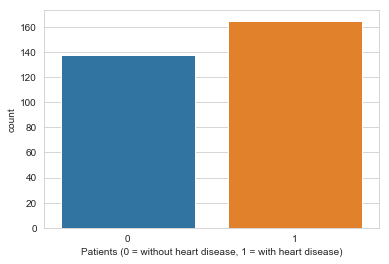

In [127]:
# Study for patients with and without heart disease graphically
sns.countplot(x='target', data=df)
plt.xlabel("Patients (0 = without heart disease, 1 = with heart disease)")

In [128]:
# Check how many patients have heart disease and how many don't
HDPatients = len(df.target)
HDPositive = len(df[df.target==0])
HDNegative = len(df[df.target==1])
print("Patients with heart disease = {:.2f}%".format(HDPositive/HDPatients*100))
print("Patients without heart disease = {:.2f}%".format(HDNegative/HDPatients*100))

Patients with heart disease = 45.54%
Patients without heart disease = 54.46%


Text(0.5, 0, '(0 = Femal patients, 1 = Male patients)')

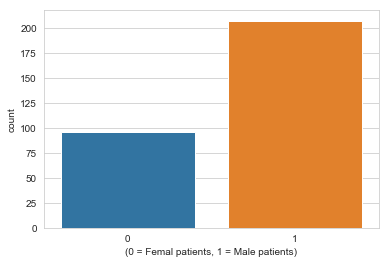

In [129]:
# Study Female, Male patients graphically
sns.countplot(x='sex', data=df)
plt.xlabel("(0 = Femal patients, 1 = Male patients)")

In [130]:
# Check Female, Male patient percentage
FemalePatients = len(df[df.sex == 0])
MalePatients = len(df[df.sex == 1])
print("Female patients = {:.2f}%".format(FemalePatients/(len(df.sex))*100))
print("Male patients = {:.2f}%".format(MalePatients/(len(df.sex))*100))

Female patients = 31.68%
Male patients = 68.32%


In [131]:
# Check mean values of all features of patients with and without heart disease
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [132]:
# Check the patients for heart disease by 'Age' numerically
pd.crosstab(df.age, df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


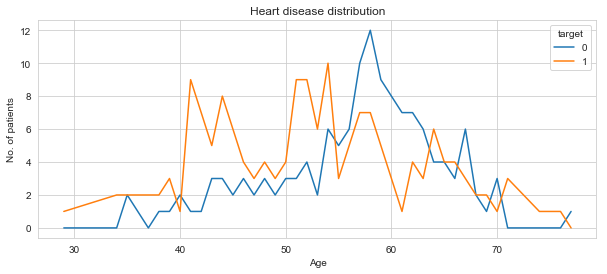

In [133]:
# Now, study the same graphically
pd.crosstab(df.age, df.target).plot(figsize=(10, 4), grid=True)
plt.title('Heart disease distribution')
plt.xlabel('Age')
plt.ylabel('No. of patients')
plt.savefig('HeartdiseaseAgewise')

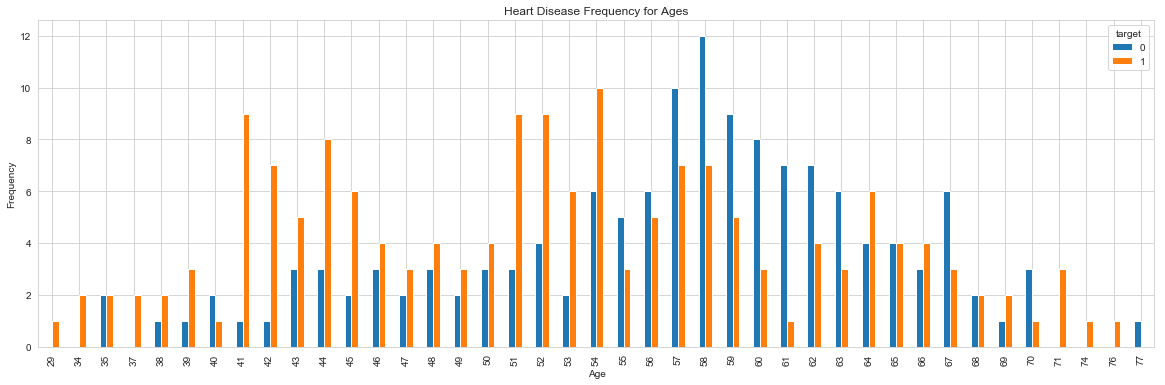

In [134]:
# Author of this article showed the heart disease distribution as a bar chart (instead of histogram as I've Showed above)
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [135]:
# Verify the patients for heart disease by 'Sex' numerically
# Observations:
#    1) Females - patients with heart disease : without heart disease = 25:75
#    2) Males   - patients with heart disease : without heart disease = 55:45
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

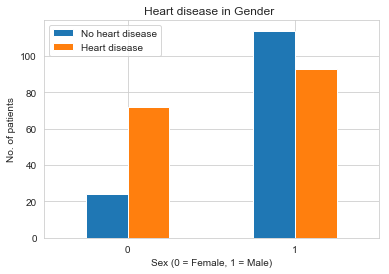

In [136]:
# Study the patients for heart diseas by 'Sex' graphically
pd.crosstab(df.sex, df.target).plot(kind='bar')
plt.title('Heart disease in Gender ')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('No. of patients')
plt.legend(['No heart disease', 'Heart disease'])
plt.xticks(rotation=0)

Text(0, 0.5, 'Max. heart rate')

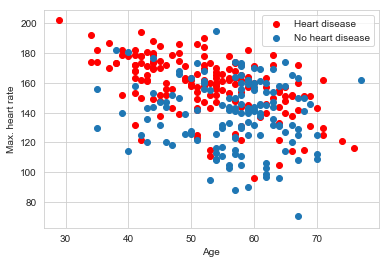

In [137]:
# Study Age vs maximum heart rate among patients (with and without heart disease)
# Age vs max heart rate in patients with heart disease
plt.scatter(x = df.age[df.target == 1], y = df.thalach[(df.target == 1)], c='red')

# Age vs max heart rate in patients without heart disease
plt.scatter(x = df.age[df.target == 0], y = df.thalach[(df.target == 0)])

plt.legend(["Heart disease", "No heart disease"])
plt.xlabel("Age")
plt.ylabel("Max. heart rate")

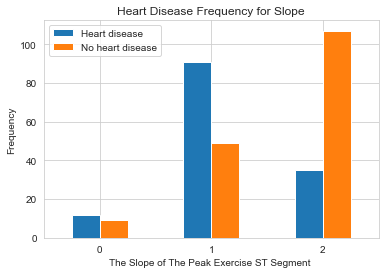

In [138]:
pd.crosstab(df.slope,df.target).plot(kind="bar",)
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.legend(["Heart disease", "No heart disease"])
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

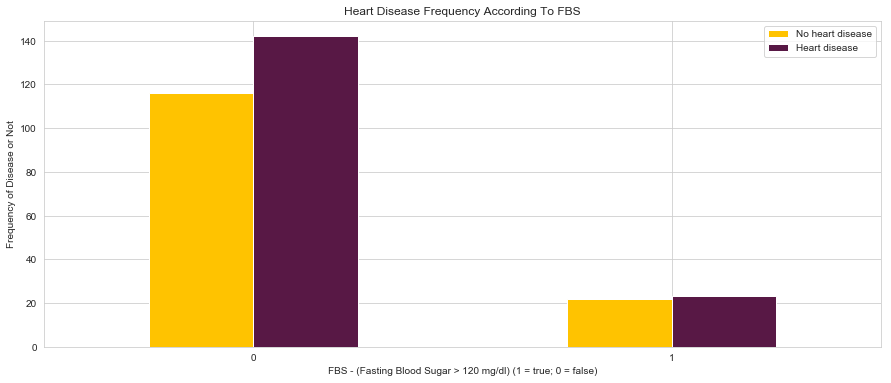

In [139]:
pd.crosstab(df.fbs, df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["No heart disease", "Heart disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

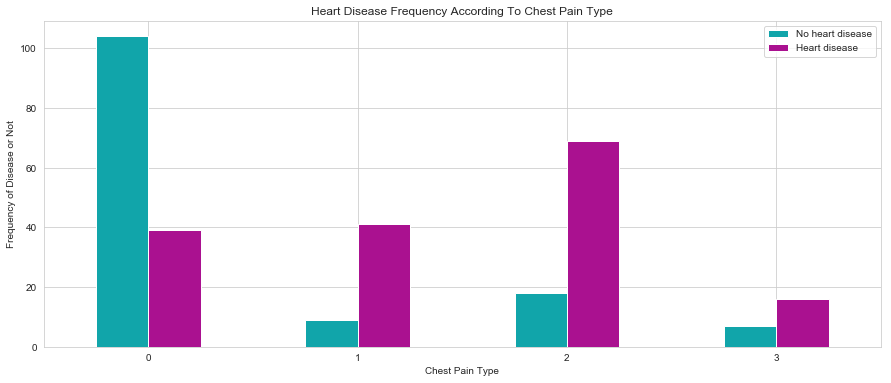

In [140]:
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.legend(["No heart disease", "Heart disease"])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

#### Create dummy variables

In [141]:
# Convert cp, thal, and slope categorical features into dummy variables
df_cp = pd.get_dummies(df['cp'], prefix='cp')
df_thal = pd.get_dummies(df['thal'], prefix='thal')
df_slope = pd.get_dummies(df['slope'], prefix='slope')

# Add the new dummy features to the main data frame


In [142]:
frames = [df, df_cp, df_thal, df_slope]
# Concatenate df with the newly created data frames
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [143]:
# Remove original columns cp, thal, slope as they are not required
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


#### Create Model for Logistic Regression using formulae manually

In [144]:
# Store target variable into y
y = df.target.values

# Retain only feature data dropping target variable
x_data = df.drop(['target'], axis = 1)

$$
X_{changed} = \frac{X - X_{min}} {X_{max} - X_{min}}
$$

Q. Why do we normalize data?
A. Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.
For example, consider a data set containing two features viz., "age" and "income". "Age" ranges from 1 to 100 say and "salary" ranges 5,000 to 50,000. The two features are in different ranges. When we do further analysis, the feature "Salary" may influence the result. So we do normalize data to bring all the features to a common platform.

In [145]:
# Normalize feature data
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [146]:
# Split data into train:test = 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [147]:
# Transpose the data sets
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [148]:
# Let us consider weight = 0.01, bias = 0
# Initialize
def initialize(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

In [149]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [150]:
def forwardBackward(weight, bias, x_train, y_train):
    # Forward
    y_head = sigmoid(np.dot(weight.T, x_train) + bias)
    loss = -(y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train, ((y_head - y_train).T)) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost, gradients

In [151]:
def update(weight, bias, x_train, y_train, learningRate, iteration):
    costList = []
    index = []
    
    # for each iteration, update weight and bias values
    for i in range(iteration):
        cost, gradients = forwardBackward(weight, bias, x_train, y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)
        
    parameters = {"weight" : weight, "bias" : bias}
    
    print("iteration : ", iteration)
    print("cost : ", cost)
    
    plt.plot(index, costList)
    plt.xlabel("Number of Itereation")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters, gradients

In [152]:
def predict(weight, bias, x_test):
    z = np.dot(weight.T, x_test) + bias
    y_head = sigmoid(z)
    
    y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return y_prediction

In [153]:
def logistic_regression(x_train, y_train, x_test, y_test, learningRate, iteration):
    dimension = x_train.shape[0]
    weight, bias = initialize(dimension)
    
    parameters, gradients = update(weight, bias, x_train, y_train, learningRate, iteration)
    y_prediction = predict(parameters["weight"], parameters["bias"], x_test)
    
    print("Manual Test Accuracy : {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test)) * 100) / 100 * 100))

iteration :  100
cost :  0.3597736123664534


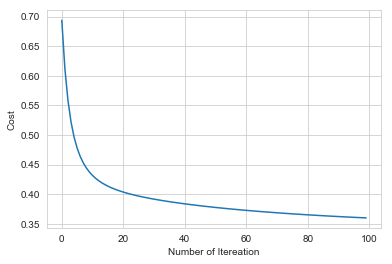

Manual Test Accuracy : 86.89%


In [154]:
logistic_regression(x_train, y_train, x_test, y_test, 1, 100)

#### Create Model for Logistic Regression using Scikit Library

In [155]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train.T, y_train.T)
print("Scikit Library's Logistic Regression Test Accuracy: {:.2f}%".format(lr.score(x_test.T, y_test.T) * 100))

Scikit Library's Logistic Regression Test Accuracy: 86.89%


#### K-Nearest Neighbour (KNN) Classification

In [156]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.05%


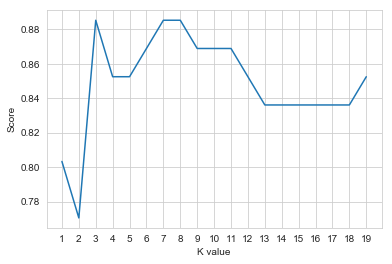

Maximum KNN Score is 88.52%


In [157]:
# Try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

#### Support Vector Machine (SVM) Algorithm

In [158]:
from sklearn.svm import SVC

svm = SVC(gamma='scale', random_state = 1)
svm.fit(x_train.T, y_train.T)

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test.T,y_test.T)*100))

Test Accuracy of SVM Algorithm: 86.89%


#### Naive Bayes Algorithm

In [159]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test.T,y_test.T)*100))

Accuracy of Naive Bayes: 86.89%


#### Decision Tree Algorithm

In [160]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Decision Tree Test Accuracy 78.69%


#### Random Forest Classification

In [161]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test.T, y_test.T)*100))

Random Forest Algorithm Accuracy Score : 88.52%


#### Compare all the models

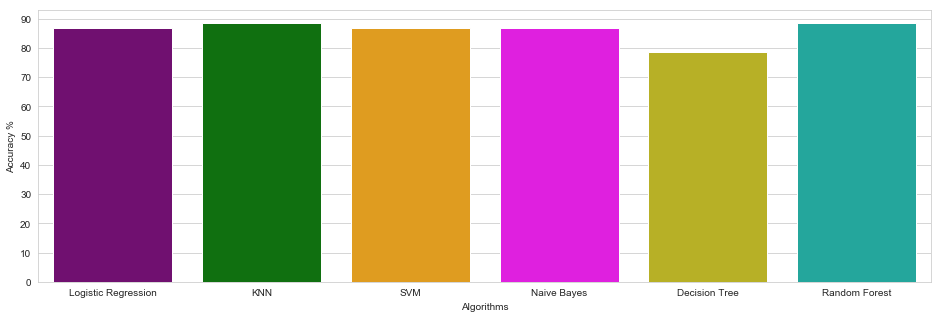

In [162]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [86.89, 88.52, 86.89, 86.89, 78.69, 88.52]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

#### Our models work fine but best of them are KNN and Random Forest with 88.52% of accuracy. Let's look their confusion matrixes.

#### Confusion Matrix

In [163]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [164]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

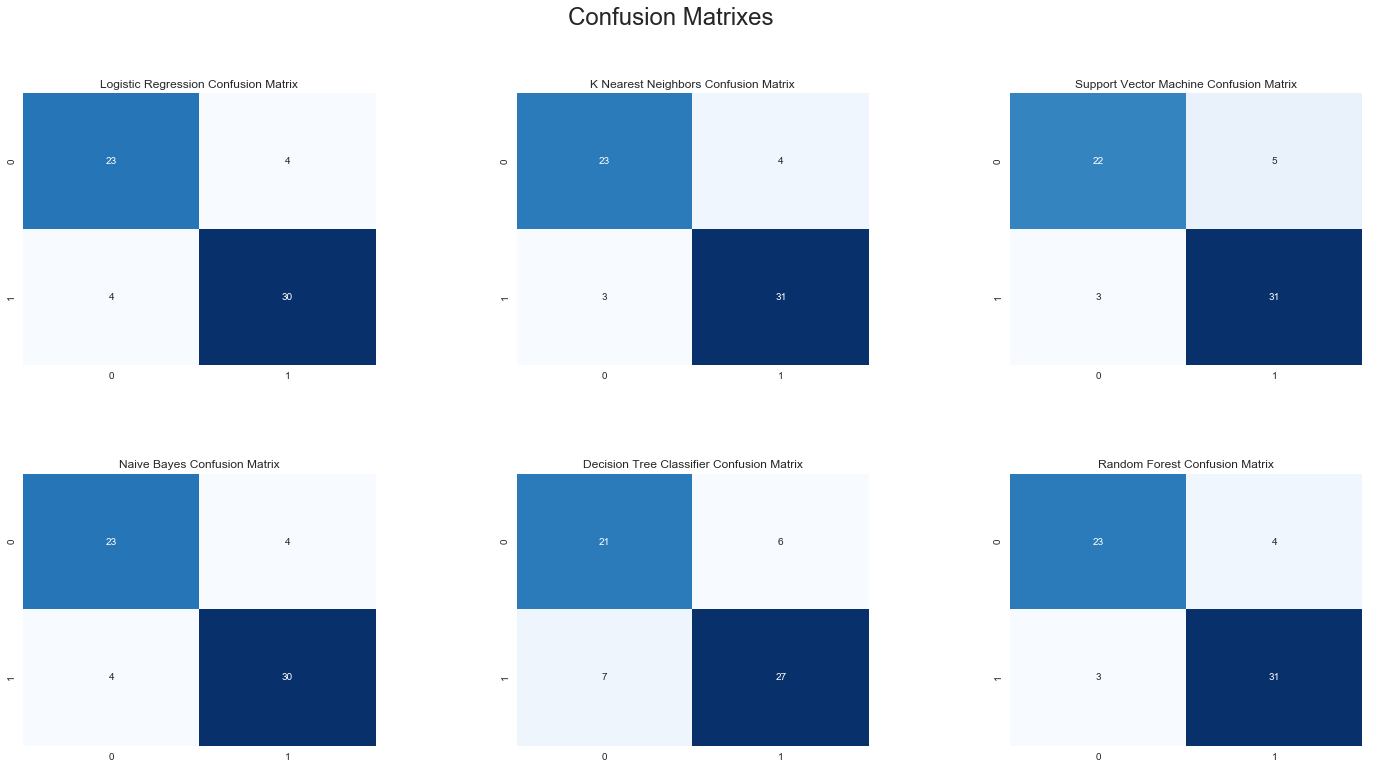

In [165]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()